In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set()

In [2]:
#load all the data into separate variables since I do not know if they are all the same
l_2007_2011 = pd.read_csv('loan_data/Loans_2007_2011.csv') 
l_2012_2013 = pd.read_csv('loan_data/Loans_2012_2013.csv') 
l_2014 = pd.read_csv('loan_data/Loans_2014.csv')
l_2015 = pd.read_csv('loan_data/Loans_2015.csv')
l_2016_q1 = pd.read_csv('loan_data/Loans_2016_Q1.csv')
l_2016_q2 = pd.read_csv('loan_data/Loans_2016_Q2.csv')
l_2016_q3 = pd.read_csv('loan_data/Loans_2016_Q3.csv')
l_2016_q4 = pd.read_csv('loan_data/Loans_2016_Q4.csv')
l_2017_q1 = pd.read_csv('loan_data/Loans_2017_Q1.csv')
l_2017_q2 = pd.read_csv('loan_data/Loans_2017_Q2.csv')
l_2017_q3 = pd.read_csv('loan_data/Loans_2017_Q3.csv')
l_2017_q4 = pd.read_csv('loan_data/Loans_2017_Q4.csv')
l_2018_q1 = pd.read_csv('loan_data/Loans_2018_Q1.csv')

C:\Users\JustinD\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (49,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\JustinD\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\JustinD\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\JustinD\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, co

In [3]:
all_loans = [l_2007_2011,l_2012_2013,l_2014,l_2015,l_2016_q1,l_2016_q2,l_2016_q3,l_2016_q4, \
             l_2017_q1,l_2017_q2, l_2017_q3, l_2017_q4, l_2018_q1]


In [4]:
#compare column number and empty columns
def checker(list,printer=True):
    empty = {}
    for data in list:
        columns = data.columns
        zero_count = 0
        for column in columns:
            if data[column].count() == 0:
                zero_count += 1
                if column in empty:
                    empty[column] += 1
                else:
                    empty[column] = 1 
            else:
                zero_count = zero_count
        if printer == True:
            print('zero_count: ',zero_count)
            print('number of columns: ', data.shape[1])
      
    empties = pd.DataFrame({'columns': empty})
    
    return empties

In [5]:
checker(all_loans).sort_values('columns')


zero_count:  83
number of columns:  144
zero_count:  31
number of columns:  151
zero_count:  31
number of columns:  151
zero_count:  14
number of columns:  151
zero_count:  14
number of columns:  151
zero_count:  14
number of columns:  151
zero_count:  14
number of columns:  151
zero_count:  14
number of columns:  151
zero_count:  2
number of columns:  151
zero_count:  2
number of columns:  151
zero_count:  2
number of columns:  151
zero_count:  4
number of columns:  145
zero_count:  24
number of columns:  145


,columns
acc_open_past_24mths,1
mths_since_recent_inq,1
mths_since_recent_revol_delinq,1
next_pymnt_d,1
num_accts_ever_120_pd,1
num_actv_bc_tl,1
num_actv_rev_tl,1
num_bc_sats,1
num_bc_tl,1
num_il_tl,1


In [6]:
#initial eda of the data
everything = pd.concat(all_loans)
print('rows: ',everything.shape[0])
print('columns: ',everything.shape[0])
print()
print('column names:')

columns = everything.columns
for column in columns:
    print (column)

rows:  1870541
columns:  1870541

column names:
acc_now_delinq
acc_open_past_24mths
addr_state
all_util
annual_inc
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collection_recovery_fee
collections_12_mths_ex_med
debt_settlement_flag
debt_settlement_flag_date
deferral_term
delinq_2yrs
delinq_amnt
desc
disbursement_method
dti
dti_joint
earliest_cr_line
emp_length
emp_title
fico_range_high
fico_range_low
funded_amnt
funded_amnt_inv
grade
hardship_amount
hardship_dpd
hardship_end_date
hardship_flag
hardship_last_payment_amount
hardship_length
hardship_loan_status
hardship_payoff_balance_amount
hardship_reason
hardship_start_date
hardship_status
hardship_type
home_ownership
id
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
member_id
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_

Thanks to the checker function we can see that the number of columns of each file match up and we have not gained more columns than we had.  For this project we will focus on loans that have completed their term.  Since we are only concerning ourselves with whether or not a loan is charged off or not, information pertaining to what happens during collections and settlement will be excluded as variables. 

In [7]:
everything.term.value_counts()

 36 months    1338057
 60 months     532484
Name: term, dtype: int64

In [8]:
#sort out the completed loans and convert to datetimes
completed_2015 = l_2015.loc[l_2015['term']==' 36 months']
completed_2015['issue_d'] = pd.to_datetime(completed_2015['issue_d'])
completed_2015['earliest_cr_line'] = pd.to_datetime(completed_2015['earliest_cr_line'])
completed_2015 = completed_2015.loc[completed_2015['issue_d'] <= pd.to_datetime('5/1/2015')]

completed_2014 = l_2014.loc[l_2014['term']==' 36 months']
completed_2014['issue_d'] = pd.to_datetime(completed_2014['issue_d'])
completed_2014['earliest_cr_line'] = pd.to_datetime(completed_2014['earliest_cr_line'])

short_2012_2013 = l_2012_2013.loc[l_2012_2013['term']==' 36 months']
long_2012_2013 = l_2012_2013.loc[l_2012_2013['term']==' 60 months']
short_2012_2013['issue_d'] = pd.to_datetime(short_2012_2013['issue_d'])
long_2012_2013['issue_d'] = pd.to_datetime(long_2012_2013['issue_d'])
long_2012_2013 = long_2012_2013.loc[long_2012_2013['issue_d'] <= pd.to_datetime('5/1/2013')]
completed_2012_2013 = pd.concat([short_2012_2013, long_2012_2013])
completed_2012_2013['earliest_cr_line'] = pd.to_datetime(completed_2012_2013['earliest_cr_line'])

before_2015 = [l_2007_2011, completed_2012_2013, completed_2014, completed_2015]


C:\Users\JustinD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JustinD\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\JustinD\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [9]:
#columns we want to keep
rev_cols = ['loan_amnt', 'funded_amnt', 'term', 'grade', 'sub_grade', 'installment', 'emp_length', 'home_ownership', 'int_rate',  \
           'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', \
           'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', \
            'policy_code', 'application_type', 'revol_bal', 'revol_util']

#reduce columns and combine together.
before_2015_reduced = [loan[rev_cols] for loan in before_2015]
completed = pd.concat(before_2015_reduced, axis=0)
print(completed.shape)


(467350, 26)


In [10]:
#with credit scores used from 2012 onwards
ficos = [completed_2012_2013, completed_2014, completed_2015]

w_ficos = ['loan_amnt', 'funded_amnt', 'term', 'grade', 'sub_grade', 'installment', 'emp_length', 'home_ownership', 'int_rate',  \
           'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', \
           'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', \
            'policy_code', 'application_type', 'revol_bal', 'revol_util']

#reduce columns and combine together.
not_first = [loan[w_ficos] for loan in ficos]
using_ficos = pd.concat(not_first, axis=0)


In [11]:
#clean up used up variables
del l_2007_2011
del l_2012_2013
del l_2014
del l_2015
del l_2016_q1
del l_2016_q2
del l_2016_q3
del l_2016_q4
del l_2017_q1
del l_2017_q2
del l_2017_q3
del l_2017_q4
del l_2018_q1

del everything
del columns

del rev_cols
del completed_2015
del before_2015_reduced
del completed_2014
del completed_2012_2013

In [12]:
#convert to datetime and find length of credit before loans
print(completed.shape)
completed['earliest_cr_line'] = pd.to_datetime(completed['earliest_cr_line'], errors='coerce')
completed['issue_d'] = pd.to_datetime(completed['issue_d'], errors='coerce')
completed = completed.dropna()
print(completed.shape)

completed['cr_length'] = completed.issue_d - completed.earliest_cr_line
completed['cr_length'] = completed['cr_length'].dt.days
completed['cr_length'] = completed['cr_length']/365

(467350, 26)
(452250, 26)


In [13]:
completed.head(10)

,loan_amnt,funded_amnt,term,grade,sub_grade,installment,emp_length,home_ownership,int_rate,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,policy_code,application_type,revol_bal,revol_util,cr_length
0,5000,5000,36 months,B,B2,162.87,10+ years,RENT,10.65%,24000.0,...,1985-01-01,1,3,0,9,1,Individual,13648,83.70%,26.931507
1,2500,2500,60 months,C,C4,59.83,< 1 year,RENT,15.27%,30000.0,...,1999-04-01,5,3,0,4,1,Individual,1687,9.40%,12.676712
3,10000,10000,36 months,C,C1,339.31,10+ years,RENT,13.49%,49200.0,...,1996-02-01,1,10,0,37,1,Individual,5598,21%,15.841096
4,3000,3000,60 months,B,B5,67.79,1 year,RENT,12.69%,80000.0,...,1996-01-01,0,15,0,38,1,Individual,27783,53.90%,15.926027
10,6500,6500,60 months,C,C3,153.45,5 years,OWN,14.65%,72000.0,...,1998-01-01,2,14,0,23,1,Individual,4032,20.60%,13.923288
11,12000,12000,36 months,B,B5,402.54,10+ years,OWN,12.69%,75000.0,...,1989-10-01,0,12,0,34,1,Individual,23336,67.10%,22.180822
14,10000,10000,36 months,B,B2,325.74,3 years,RENT,10.65%,100000.0,...,1991-05-01,2,14,0,29,1,Individual,11997,55.50%,20.600000
16,10000,10000,36 months,C,C4,347.98,4 years,RENT,15.27%,42000.0,...,1998-10-01,2,14,0,28,1,Individual,24043,70.20%,13.175342
17,3600,3600,36 months,A,A1,109.57,10+ years,MORTGAGE,6.03%,110000.0,...,1993-08-01,0,20,0,42,1,Individual,22836,16%,18.345205
20,20250,20250,60 months,C,C4,484.63,3 years,RENT,15.27%,43370.0,...,1997-11-01,3,8,0,22,1,Individual,17813,85.60%,14.090411


In [14]:
#find non-null values in each column
completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452250 entries, 0 to 421094
Data columns (total 27 columns):
loan_amnt              452250 non-null int64
funded_amnt            452250 non-null int64
term                   452250 non-null object
grade                  452250 non-null object
sub_grade              452250 non-null object
installment            452250 non-null float64
emp_length             452250 non-null object
home_ownership         452250 non-null object
int_rate               452250 non-null object
annual_inc             452250 non-null float64
verification_status    452250 non-null object
issue_d                452250 non-null datetime64[ns]
loan_status            452250 non-null object
purpose                452250 non-null object
addr_state             452250 non-null object
dti                    452250 non-null float64
delinq_2yrs            452250 non-null int64
earliest_cr_line       452250 non-null datetime64[ns]
inq_last_6mths         452250 non-null int64


In [15]:
#remove percentage sign and convert to decimal floats
def stripper(x):
    y = np.nan
    if x != np.nan:
        try: 
            y = float(float(x.strip('%'))/100)
        except: 
            y = y
    return y

completed['int_rate'] = completed.int_rate.apply(stripper)
completed['revol_util'] = completed.revol_util.apply(stripper)

In [16]:
#explore target variable
print(completed.loan_status.value_counts())

Fully Paid            385170
Charged Off            64255
Current                 2341
Late (31-120 days)       313
In Grace Period          106
Late (16-30 days)         63
Default                    2
Name: loan_status, dtype: int64


In [17]:
#remove rows where loan periods were extended and still on going.
completed = completed[completed['loan_status'] != 'Current']
completed = completed[completed['loan_status']!='Late (31-120 days)']
completed = completed[completed['loan_status']!='Late (16-30 days)']
completed = completed[completed['loan_status']!='In Grace Period']
completed.loan_status.loc[completed['loan_status'] == 'Default'] = 'Charged Off'

In [18]:
#find facts about loans themselves
print(completed.loan_status.value_counts())
print()
print('Total amount of all loans: ${:0.2f}'.format(completed.funded_amnt.sum()))
print('Average loan amount: ${:0.2f}'.format(completed.funded_amnt.mean()))
print('Median loan amount: ${:0.2f}'.format(completed.funded_amnt.median()))

Fully Paid     385170
Charged Off     64257
Name: loan_status, dtype: int64

Total amount of all loans: $5808257625.00
Average loan amount: $12923.70
Median loan amount: $10775.00


In [19]:
#create charged off column
completed['default'] = completed.loan_status == 'Charged Off'
completed = completed.reset_index()
completed.head()


,index,loan_amnt,funded_amnt,term,grade,sub_grade,installment,emp_length,home_ownership,int_rate,...,inq_last_6mths,open_acc,pub_rec,total_acc,policy_code,application_type,revol_bal,revol_util,cr_length,default
0,0,5000,5000,36 months,B,B2,162.87,10+ years,RENT,0.1065,...,1,3,0,9,1,Individual,13648,0.837,26.931507,False
1,1,2500,2500,60 months,C,C4,59.83,< 1 year,RENT,0.1527,...,5,3,0,4,1,Individual,1687,0.094,12.676712,True
2,3,10000,10000,36 months,C,C1,339.31,10+ years,RENT,0.1349,...,1,10,0,37,1,Individual,5598,0.210,15.841096,False
3,4,3000,3000,60 months,B,B5,67.79,1 year,RENT,0.1269,...,0,15,0,38,1,Individual,27783,0.539,15.926027,False
4,10,6500,6500,60 months,C,C3,153.45,5 years,OWN,0.1465,...,2,14,0,23,1,Individual,4032,0.206,13.923288,False


In [20]:
#interest and default rates by subgroup
group_interest = completed.groupby(['grade','term'])['int_rate'].mean()

temp1 = completed.groupby(['grade','term'])['default'].count()
temp2 = completed.groupby(['grade','term'])['default'].sum()
temp3 = temp2/temp1 

group_interest = pd.concat([group_interest, temp3,temp1], axis=1)
group_interest.columns = ['int_rate','default_rate','count']
group_interest

int_rate  default_rate   count
grade term                                      
A      36 months  0.073973      0.055708   95013
       60 months  0.081414      0.077852     745
B      36 months  0.112590      0.109630  145352
       60 months  0.117640      0.162485    4862
C      36 months  0.142719      0.172121  109342
       60 months  0.154474      0.223160    7349
D      36 months  0.174254      0.223976   54430
       60 months  0.181119      0.278172    4792
E      36 months  0.202589      0.271194   15299
       60 months  0.205359      0.317898    5291
F      36 months  0.238230      0.306018    3307
       60 months  0.226735      0.373134    2747
G      36 months  0.251207      0.340426     329
       60 months  0.238512      0.381371     569

In [21]:
#interest and default rates by subgroup
subgroup_interest = completed.groupby(['sub_grade','term'])['int_rate'].mean()

temp1 = completed.groupby(['sub_grade','term'])['default'].count()
temp2 = completed.groupby(['sub_grade','term'])['default'].sum()
temp3 = temp2/temp1 

subgroup_interest = pd.concat([subgroup_interest, temp3,temp1], axis=1)
subgroup_interest.columns = ['int_rate','default_rate','count']
subgroup_interest

int_rate  default_rate  count
sub_grade term                                     
A1         36 months  0.059792      0.027007  13441
A2         36 months  0.065158      0.041324  14713
           60 months  0.060885      0.076923     13
A3         36 months  0.072499      0.048764  15975
           60 months  0.063822      0.031250     32
A4         36 months  0.076309      0.061744  23824
           60 months  0.074718      0.059783    184
A5         36 months  0.084624      0.076571  27060
           60 months  0.085410      0.087209    516
B1         36 months  0.093701      0.086994  25266
           60 months  0.099746      0.108407    452
B2         36 months  0.104062      0.095137  29158
           60 months  0.108321      0.139310    725
B3         36 months  0.113814      0.108006  32600
           60 months  0.116025      0.141921   1374
B4         36 months  0.121834      0.118128  30797
           60 months  0.124393      0.189016   1402
B5         36 months  0.127169      0.138172  27531
           60 months  0.126000      0.198020    909
C1         36 months  0.132918      0.148392  27178
           60 months  0.136846      0.208042   1144
C2         36 months  0.138129      0.163755  24726
           60 months  0.146797      0.196040   1515
C3         36 months  0.143801      0.177278  21723
           60 months  0.153936      0.225911   1536
C4         36 months  0.149699      0.190200  18775
           60 months  0.160478      0.224293   1556
C5         36 months  0.156022      0.195750  16940
           60 months  0.169041      0.255945   1598
D1         36 months  0.164182      0.211208  14971
...                        ...           ...    ...
E1         36 months  0.191918      0.262344   4719
           60 months  0.194331      0.296860   1051
E2         36 months  0.199452      0.262554   3923
           60 months  0.200712      0.323785   1152
E3         36 months  0.205015      0.273860   2808
           60 months  0.205968      0.306667   1050
E4         36 months  0.213105      0.279805   2055
           60 months  0.211768      0.324397   1119
E5         36 months  0.221679      0.299331   1794
           60 months  0.215297      0.339499    919
F1         36 months  0.231556      0.278878   1212
           60 months  0.221895      0.350877    798
F2         36 months  0.236608      0.296403    695
           60 months  0.225189      0.338855    664
F3         36 months  0.242530      0.306773    753
           60 months  0.229048      0.403042    526
F4         36 months  0.245863      0.343750    416
           60 months  0.231181      0.410926    421
F5         36 months  0.250368      0.406926    231
           60 months  0.232061      0.399408    338
G1         36 months  0.250833      0.326241    141
           60 months  0.240231      0.418327    251
G2         36 months  0.252531      0.298969     97
           60 months  0.236696      0.381944    144
G3         36 months  0.255623      0.361702     47
           60 months  0.238443      0.348837     86
G4         36 months  0.249911      0.407407     27
           60 months  0.235640      0.274194     62
G5         36 months  0.236594      0.529412     17
           60 months  0.239042      0.384615     26

[69 rows x 3 columns]

In [22]:
def find_default(column):    
    #interest and default rates by subgroup
    temp1 = completed.groupby([column])['default'].count()
    temp2 = completed.groupby([column])['default'].sum()
    temp3 = temp2/temp1 

    group = pd.concat([temp3,temp1], axis=1)
    group.columns = ['default_rate','count']
    return group

In [23]:
find_default('emp_length')

,default_rate,count
emp_length,,
1 year,0.145108,29006
10+ years,0.131228,140945
2 years,0.142808,40404
3 years,0.141097,35784
4 years,0.141747,27161
5 years,0.141694,29366
6 years,0.145819,24016
7 years,0.143127,24391
8 years,0.144166,21836


In [24]:
find_default('home_ownership')

,default_rate,count
home_ownership,,
ANY,0.000000,1
MORTGAGE,0.121104,215707
NONE,0.155556,45
OTHER,0.193277,119
OWN,0.148444,42629
RENT,0.166431,190926


In [25]:
find_default('inq_last_6mths')

,default_rate,count
inq_last_6mths,,
0,0.124047,240941
1,0.152916,125618
2,0.176435,52603
3,0.193170,21934
4,0.194560,5551
5,0.198005,2005
6,0.213184,713
7,0.243902,41
8,0.142857,21


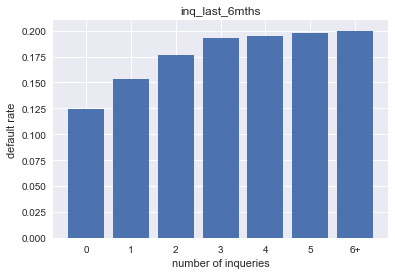

In [26]:
inq = find_default('inq_last_6mths')

inq_group = pd.DataFrame(index=['0','1','2','3','4','5','6+'], columns=['default_rate'])
inq_group['default_rate']['0']=inq['default_rate'][0]
inq_group['default_rate']['1']=inq['default_rate'][1]
inq_group['default_rate']['2']=inq['default_rate'][2]
inq_group['default_rate']['3']=inq['default_rate'][3]
inq_group['default_rate']['4']=inq['default_rate'][4]
inq_group['default_rate']['5']=inq['default_rate'][5]
inq_group['default_rate']['6+']=inq['default_rate'][6:].mean()

plt.bar(inq_group.index,inq_group.default_rate)
plt.title('inq_last_6mths')
plt.xlabel('number of inqueries')
plt.ylabel('default rate')
plt.show()

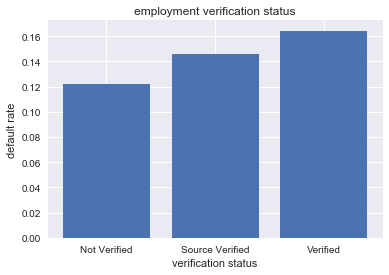

In [27]:
find_default('verification_status')

plt.bar(find_default('verification_status').index, find_default('verification_status').default_rate)
plt.title('employment verification status')
plt.xlabel('verification status')
plt.ylabel('default rate')
plt.show()

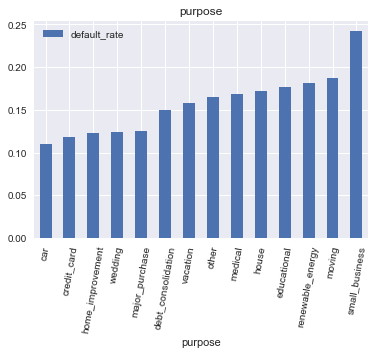

In [28]:
p1 = find_default('purpose').sort_values('default_rate')
p1 = p1.drop('count', axis=1)

p1.plot(kind='bar')
plt.title('purpose')
plt.xticks(rotation=80)
plt.show()

In [29]:
find_default('delinq_2yrs')

,default_rate,count
delinq_2yrs,,
0,0.141513,367117
1,0.145083,55134
2,0.156599,16124
3,0.161903,5633
4,0.158408,2462
5,0.165635,1292
6,0.152738,694
7,0.171662,367
8,0.125628,199


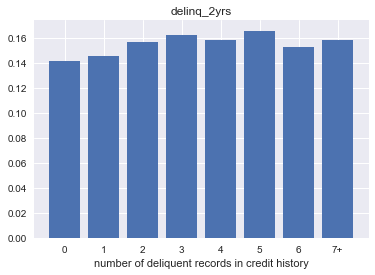

In [30]:
delinq = find_default('delinq_2yrs')

delinq_group = pd.DataFrame(index=['0','1','2','3','4','5','6','7+'], columns=['default_rate'])
delinq_group['default_rate']['0']=delinq['default_rate'][0]
delinq_group['default_rate']['1']=delinq['default_rate'][1]
delinq_group['default_rate']['2']=delinq['default_rate'][2]
delinq_group['default_rate']['3']=delinq['default_rate'][3]
delinq_group['default_rate']['4']=delinq['default_rate'][4]
delinq_group['default_rate']['5']=delinq['default_rate'][5]
delinq_group['default_rate']['6']=delinq['default_rate'][6]
delinq_group['default_rate']['7+']=delinq['default_rate'][7:].mean()

plt.bar(delinq_group.index,delinq_group.default_rate)
plt.title('delinq_2yrs')
plt.xlabel('number of deliquent records in credit history')
plt.show()

In [31]:
def hist_defaults(string, df=completed):
    series_true = df[string].loc[df['default']==True]
    series_false = df[string].loc[df['default']==False]
    plt.hist(series_false.dropna(), bins=30, color='blue', normed=True, alpha=0.5)
    plt.hist(series_true.dropna(), bins=30, color='red', normed=True, alpha=0.5)
    plt.legend(['Paid Off','Defaulted'])
    plt.xlabel(string)
    plt.title(string)
    plt.show()


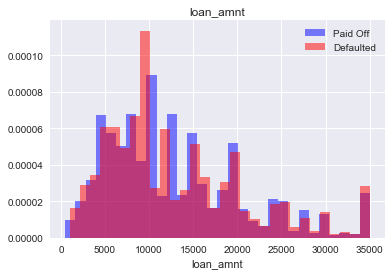

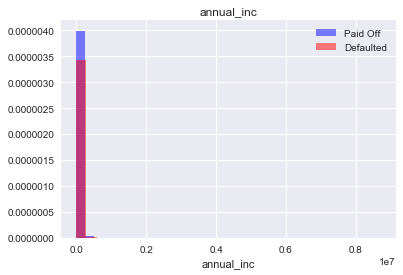

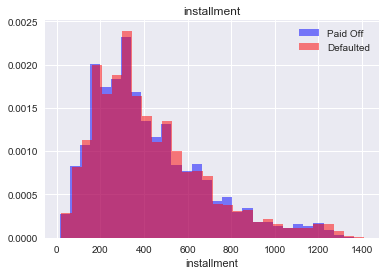

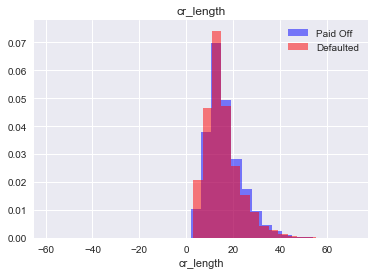

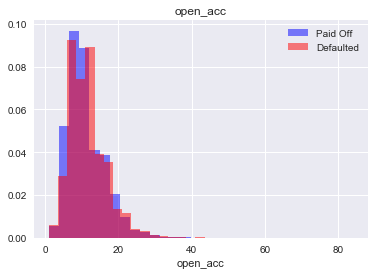

In [32]:

hist_defaults('loan_amnt')
hist_defaults('annual_inc')
hist_defaults('installment')
hist_defaults('cr_length')
hist_defaults('open_acc')


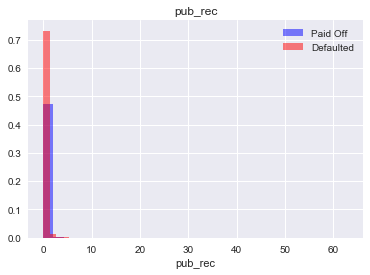

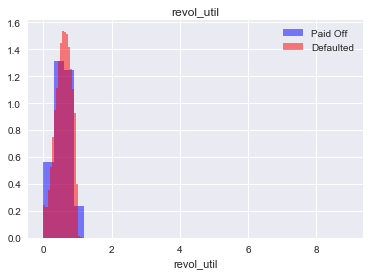

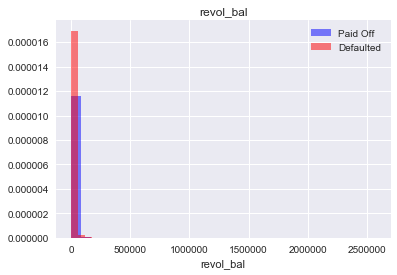

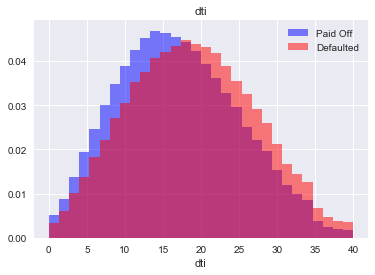

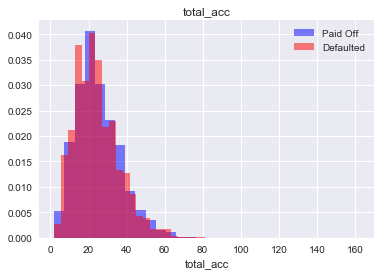

In [33]:
hist_defaults('pub_rec')
hist_defaults('revol_util')
hist_defaults('revol_bal')
hist_defaults('dti')
hist_defaults('total_acc')

In [34]:
#remove outliers to see histograms in better detail
def outlierless(string, num):
    df = completed.loc[completed[string] <= num][[string, 'default']]
    return df


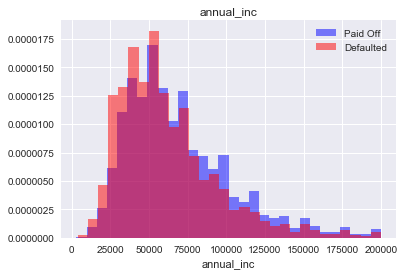

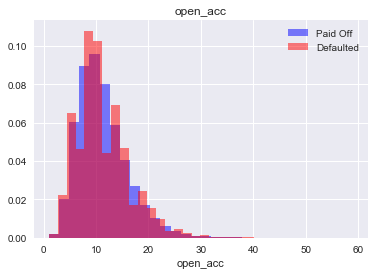

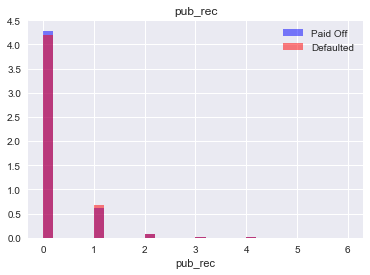

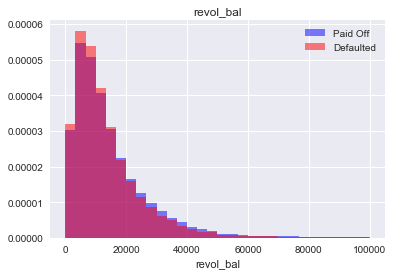

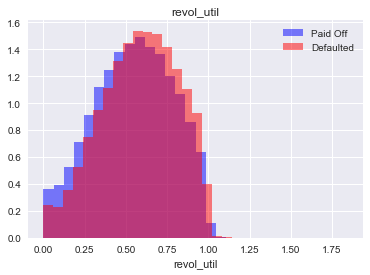

In [35]:
less_annual = outlierless('annual_inc', 200000)
hist_defaults('annual_inc',less_annual)
less_open = outlierless('open_acc', 60)
hist_defaults('open_acc',less_open)
less_pub = outlierless('pub_rec', 6)
hist_defaults('pub_rec',less_pub)
less_revolb = outlierless('revol_bal', 100000)
hist_defaults('revol_bal',less_revolb)
less_revolu = outlierless('revol_util', 2)
hist_defaults('revol_util',less_revolu)

Almost all of the continous factors displayed in the histographs appear to be good predictors of the defualt rate.  The best predictors are Grade, Purpose, and Inquiries in the Last 6 Months.

In [36]:
#Make dummies and convert to numbers for machine learning algorithms
comp_list = [completed['funded_amnt'], completed['installment'], completed['int_rate'], completed['annual_inc'], \
             completed['dti'], completed['delinq_2yrs'], completed['inq_last_6mths'], completed['open_acc'], \
             completed['pub_rec'], completed['total_acc'], completed['revol_bal'], completed['revol_util'], \
             completed['cr_length'], completed['default']]

term_dum = pd.get_dummies(completed.term)
grade_dum = pd.get_dummies(completed.grade)
sgrade_dum = pd.get_dummies(completed.sub_grade)
emp_dum = pd.get_dummies(completed.emp_length)
home_dum = pd.get_dummies(completed.home_ownership)
ver_dum = pd.get_dummies(completed.verification_status)
purp_dum = pd.get_dummies(completed.purpose)
dum_list = [term_dum, grade_dum, sgrade_dum, emp_dum, home_dum, ver_dum, purp_dum]

data_list = comp_list + dum_list
data = pd.concat(data_list,axis=1)

In [37]:
#feature engineering
data['dti_over_16'] = data.dti >= 17
data['inc_over_50k'] = data.annual_inc >= 50000
data['revol_util_over_50'] = data.revol_util >= 0.50

In [38]:
#clean up more variables
del group_interest
del subgroup_interest
del inq
del inq_group
del p1
del delinq
del delinq_group

del less_annual
del less_open
del less_pub
del less_revolb
del less_revolu

del comp_list
del term_dum
del grade_dum
del sgrade_dum
del emp_dum
del home_dum
del ver_dum
del purp_dum
del dum_list
del data_list

In [39]:
print(data.shape)
data.head()

(449427, 96)


,funded_amnt,installment,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,dti_over_16,inc_over_50k,revol_util_over_50
0,5000,162.87,0.1065,24000.0,27.65,0,1,3,0,9,...,0,0,0,0,0,0,0,True,False,True
1,2500,59.83,0.1527,30000.0,1.00,0,5,3,0,4,...,0,0,0,0,0,0,0,False,False,False
2,10000,339.31,0.1349,49200.0,20.00,0,1,10,0,37,...,0,0,1,0,0,0,0,True,False,False
3,3000,67.79,0.1269,80000.0,17.94,0,0,15,0,38,...,0,0,1,0,0,0,0,True,True,True
4,6500,153.45,0.1465,72000.0,16.12,0,2,14,0,23,...,0,0,0,0,0,0,0,False,True,False


In [40]:
#now the fun begins with logistic regression and random forests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
#set up for train test split
X = data.drop('default', axis=1)
y = data.default

#split it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [42]:
#Check to see if over weighted in one direction or another
print(completed['default'].value_counts())

False    385170
True      64257
Name: default, dtype: int64


In [43]:
#resample to get an even distribution

#separate out true and false rows
training = X_train
training['target'] = y_train
sample_true = training[training.target == True]
sample_false = training[training.target == False]

#resample the true values and recombine with the training data
sample_true = resample(sample_true, replace=True, n_samples=sample_false.shape[0], random_state=20)
resampled = pd.concat([sample_true,sample_false])

#reassign to X_train and y_train
X_train = resampled.drop(['target'], axis=1)
y_train = resampled.target

C:\Users\JustinD\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
y_train.value_counts()

True     308090
False    308090
Name: target, dtype: int64

In [45]:
# Normalize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
%%time

#log regression
model1 = LogisticRegression(random_state=20)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

Wall time: 17.2 s


In [47]:
%%time

results = pd.DataFrame()
co_ef = pd.DataFrame(abs(model1.coef_)).unstack().unstack()
results['Features'] = X.columns
results = pd.concat([results, co_ef], axis=1)
results.columns = ['Features', 'Coefficients']
print(results.sort_values('Coefficients', ascending=False).head(10))

Wall time: 10 ms


In [48]:
%%time

print('R-squared score: ',model1.score(X_test, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

R-squared score:  0.611908417329
Confusion Matrix: 
[[46497 30583]
 [ 4301  8505]]

             precision    recall  f1-score   support

      False       0.92      0.60      0.73     77080
       True       0.22      0.66      0.33     12806

avg / total       0.82      0.61      0.67     89886

Wall time: 190 ms


In [49]:
%%time

#Modeling using linear Stochastic Vector Classifier
model2 = LinearSVC(random_state=20)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

Wall time: 8min 4s


In [50]:
%%time

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred2))
print()
print(classification_report(y_test, y_pred2))

Confusion Matrix: 
[[46576 30504]
 [ 4335  8471]]

             precision    recall  f1-score   support

      False       0.91      0.60      0.73     77080
       True       0.22      0.66      0.33     12806

avg / total       0.82      0.61      0.67     89886

Wall time: 144 ms


In [52]:
%%time

#K Nearest Neighbors Classifier Model
model3 = KNeighborsClassifier(n_neighbors=2)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

Wall time: 3h 22min 47s


In [53]:
%%time

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred3))
print()
print(classification_report(y_test, y_pred3))

Confusion Matrix: 
[[66885 10195]
 [10436  2370]]

             precision    recall  f1-score   support

      False       0.87      0.87      0.87     77080
       True       0.19      0.19      0.19     12806

avg / total       0.77      0.77      0.77     89886

Wall time: 104 ms


In [54]:
%%time

#Random Forest Classifier
model4 = RandomForestClassifier(max_depth=5, random_state=20)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

Wall time: 9.37 s


In [55]:
%%time

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred4))
print()
print(classification_report(y_test, y_pred4))

Confusion Matrix: 
[[44533 32547]
 [ 4269  8537]]

             precision    recall  f1-score   support

      False       0.91      0.58      0.71     77080
       True       0.21      0.67      0.32     12806

avg / total       0.81      0.59      0.65     89886

Wall time: 114 ms
